In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('Glassdoor_Gender_Pay_Gap.csv')
data.info()
Job=data['JobTitle']
Gender=data['Gender']
Age=data['Age']
PerfEval=data['PerfEval']
Education=data['Education']
Dept=data['Dept']
Seniority=data['Seniority']
BasePay=data['BasePay']
Bonus=data['Bonus']
income=BasePay+Bonus
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   objec

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
reg=linear_model.LinearRegression()
y = pd.DataFrame(data['income'])

## Linear regression with only numeric data

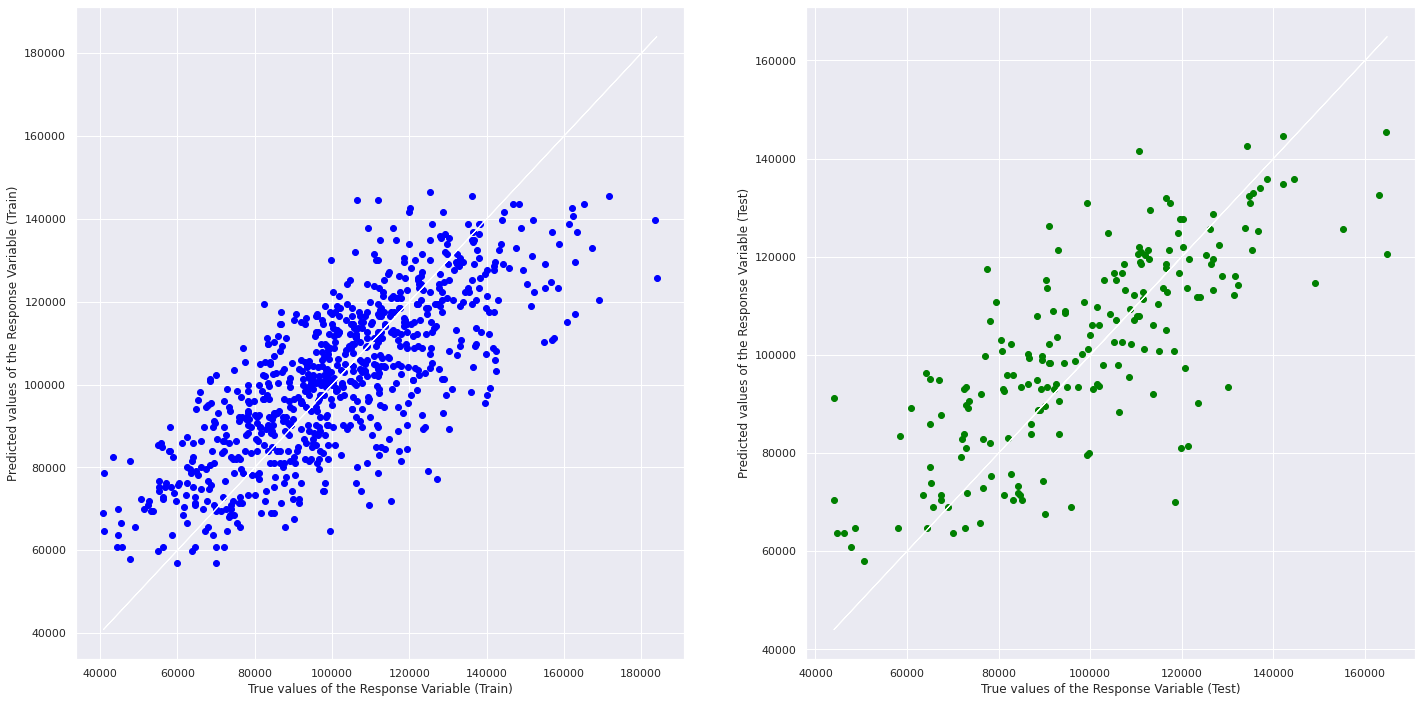

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5802067858192959
Mean Squared Error (MSE) 	: 268745819.0684261

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5815020956381218
Mean Squared Error (MSE) 	: 249148466.5918989



In [7]:
x=pd.concat([PerfEval,Seniority,Age],axis=1)
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.2)
reg.fit(x_train,y_train)

# Predict the Total values from Predictors
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
#axes[0].set_ylim(100000,300000)
#axes[0].set_xlim(0,1500000)
#axes[1].set_ylim(100000,300000)
#axes[1].set_xlim(0,1500000)
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", reg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", reg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### This model is moderately accurate. But a explained variance of 0.58 is not significant and shows that it still can be improved.

## Linear regression with numeric and categorical data

In [15]:
x=pd.concat([Education,Job,Gender,PerfEval,Seniority,Dept,Age],axis=1)
x_dummies=pd.get_dummies(x)
x_dummies


,PerfEval,Seniority,Age,Education_College,Education_High School,Education_Masters,Education_PhD,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,...,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Gender_Female,Gender_Male,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,5,2,18,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,5,5,21,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,4,5,19,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,5,4,20,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,5,5,26,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,61,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
996,1,2,57,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
997,1,1,48,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
998,2,1,65,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


#### To use categorical data for linear regression model, we use dummy encoding

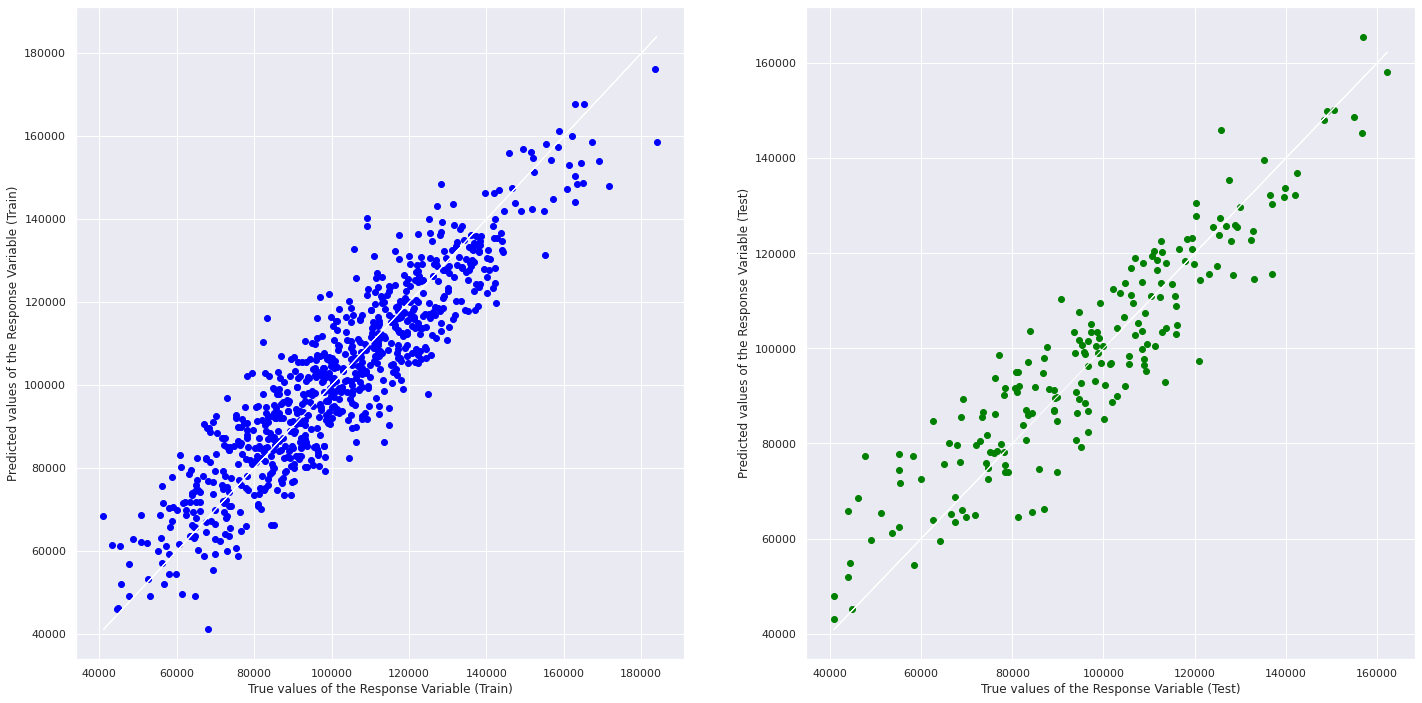

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8366075109260754
Mean Squared Error (MSE) 	: 101204090.664095

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8490499950340282
Mean Squared Error (MSE) 	: 99647030.14165415



In [16]:
x_train, x_test , y_train , y_test = train_test_split(x_dummies,y, test_size=0.2)
reg.fit(x_train,y_train)

# Predict the Total values from Predictors
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
#axes[0].set_ylim(100000,300000)
#axes[0].set_xlim(0,1500000)
#axes[1].set_ylim(100000,300000)
#axes[1].set_xlim(0,1500000)
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", reg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", reg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

#### Explained variance of test dataset is 0.85 which is a lot better than the linear regression without adding categorical data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58b1880a-8741-46da-8f14-077fd1d2b5b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>